# 🛒 Walmart Sales Analysis

---

### 1.0  About the Author

  - **Ali Huzaifa**
  - Contact Info

[![LinkedIn](https://img.shields.io/badge/-LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/ali-huzaifa-cs/)
[![GitHub](https://img.shields.io/badge/-GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AliHuzaifa-cs)
[![Twitter](https://img.shields.io/badge/-Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/AlihuzaifaCS)
[![Instagram](https://img.shields.io/badge/-Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/code_with_alih/)
[![Facebook](https://img.shields.io/badge/-Facebook-1877F2?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/share/16bQPkMukv/?mibextid=wwXIfr)


### 2.0 About Data

* Data: Walmart Sales Analysis
* Dataset link: [🔗 Click here to access the dataset.](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data)

### 2.1 📊 Walmart Sales Dataset Overview

This dataset contains **weekly sales data** for **45 Walmart stores** across the United States. Each row represents data for a single store in a specific week.

### 🧾 Columns Description

| Column Name     | Description |
|------------------|-------------|
| **Store**         | Unique identifier for each Walmart store. |
| **Date**          | The week-ending date for the sales data. |
| **Weekly_Sales**  | Sales for the given store in the given week. |
| **Holiday_Flag**  | Indicates whether the week includes a special holiday (`1`) or not (`0`). Holidays include **Super Bowl**, **Labor Day**, **Thanksgiving**, and **Christmas**. |
| **Temperature**   | Average temperature for the region during the week. |
| **Fuel_Price**    | Cost of fuel in the region during the week. |
| **CPI**           | Consumer Price Index – a measure of inflation. |
| **Unemployment**  | Unemployment rate in the region during the week. |


### 2.2 🎯 Objectives

This analysis aims to explore key trends in Walmart's sales data to uncover patterns and generate actionable insights. The focus areas include:

- **Sales Trends 📈**: Analyzing how sales have changed over time.
- **Holiday Impact 🎉**: Investigating how major holidays (e.g., Christmas, Thanksgiving, Super Bowl) influence sales, and identifying which holidays were approaching during high sales periods.
- **Store-wise Performance 🏪**: Comparing performance across different stores to find top and low performers.
- **External Factors Correlation 🔍**: Examining how sales correlate with external variables like fuel prices, CPI, unemployment rates, and temperature.


By the end of this project, we aim to provide insights that can support better sales forecasting and strategy development.

### 2.3 Kernel Version Used
* Python : 3.13.2 



### 3.0 Import Libraries

- **pandas** → For data manipulation and handling.
- **numpy** → For numerical operations and calculations.
- **seaborn** → For advanced data visualizations.
- **matplotlib.pyplot** → For creating graphs and charts.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

### 4.0 Data Loading and Exploring 

In [2]:
df = pd.read_csv('data/Walmart_Sales_Data.csv')

#### Let's have a look on top 5 rows of the data

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
print(f"The Number of Rows are {df.shape[0]} , and Columns are {df.shape[1]}")

The Number of Rows are 6435 , and Columns are 8


In [6]:
print(f"The names of the columns in this data set are as follows : {df.columns}")

The names of the columns in this data set are as follows : Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### 📋 Initial Observations

- Column data types:
  - Store and Holiday_Flag are integers (categorical/identifier type).
  - Weekly_Sales, Temperature, Fuel_Price, CPI, and Unemployment are floats (numerical features).
  - Date is currently of **object type**, which should be converted to datetime format for proper time-based analysis.

### 📅 Date Format Standardization

The `Date` column initially contained date strings that may have varied in format. To ensure consistency and enable accurate time-based analysis (like trends, grouping by month/year, etc.), we converted the column to proper datetime format using:




In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [9]:
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [10]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


### 📊 Statistical Summary – Key Observations

Below are insights derived from the summary statistics of the dataset:

- **Weekly_Sales**:
  - The average weekly sales across stores is approximately **$1.05 million**.
  - Sales range from around **$209,986** to **$3.81 million**, showing a **high variation**.
  - This indicates the presence of **stores with significantly higher sales**, possibly due to location or size.

- **Holiday_Flag**:
  - The mean value is **0.07**, meaning **only ~7%** of the data corresponds to holiday weeks.
  - The data is mostly from non-holiday weeks, which is important for comparison.

- **Temperature**:
  - Temperatures range from **-2.06°F** to **100.14°F**, indicating **nationwide coverage** of stores from colder to hotter regions.

- **Fuel_Price**:
  - The price of fuel varies between **$2.47** and **$4.47**, which may affect shopping behavior and transportation costs.

- **CPI (Consumer Price Index)**:
  - CPI values range from **126.06** to **227.23**, reflecting **inflation trends** during the period covered.

- **Unemployment**:
  - Unemployment rates range from **3.88% to 14.31%**, suggesting economic fluctuation that may influence consumer spending.

- **Store**:
  - Store IDs range from **1 to 45**, confirming data for **45 different stores**.




### 4.1 Dealing With Missing Values

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### ✅ Null Value Check – Observation

- The dataset contains **no missing values** in any of the columns.
- This means **no data imputation or removal** is needed at this stage.

### 4.2 Dealing with Duplicate Value

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.duplicated().any()

np.False_

### 🔁 Duplicate Check – Observation

- np.int64(0) means **no duplicate rows** found in the dataset.
- ✅ Dataset is clean with respect to duplicate entries.


### 4.3 Dealing with Outliers

In [14]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get rows where outliers exist
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers[col] = {
        "Total Outliers": outlier_rows.shape[0],
        "Percentage": round(100 * outlier_rows.shape[0] / df.shape[0], 2)
    }

# Display outliers summary
pd.DataFrame(outliers).T.sort_values(by="Total Outliers", ascending=False)

,Total Outliers,Percentage
Unemployment,481.0,7.47
Holiday_Flag,450.0,6.99
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05
Store,0.0,0.00
Fuel_Price,0.0,0.00
CPI,0.0,0.00


### 📊 Outlier Detection – IQR Method

- Outliers were detected in a few columns using the IQR method.
- Notably:
  - `Unemployment` has the highest outlier percentage at **7.47%**, followed by `Holiday_Flag` at **6.99%**.
  - `Weekly_Sales` contains **0.53%** outliers — likely due to spikes during events like **Christmas** or **Black Friday**.
  - `Temperature` shows **negligible outliers** (0.05%), while `Store`, `Fuel_Price`, and `CPI` show **none**.
- These outliers appear to be **contextually valid** and reflect real-world variability rather than data entry errors.

✅ No outliers will be removed at this stage, as they may hold valuable insights for trend and holiday impact analysis.


## 5.0 🧪 Exploratory Data Analysis (EDA)

With the dataset cleaned and validated (no missing values, no duplicates, and contextually valid outliers), we now begin our Exploratory Data Analysis (EDA).

The goal of this phase is to:

- Understand overall sales trends over time 📈
- Analyze the impact of holidays on weekly sales 🎉
- Compare store-wise performance across the country 🏬
- Explore correlations between sales and external factors like fuel price, CPI, unemployment, and temperature 🔍



#### Q1. Which store has the highest/lowest total weekly sales?

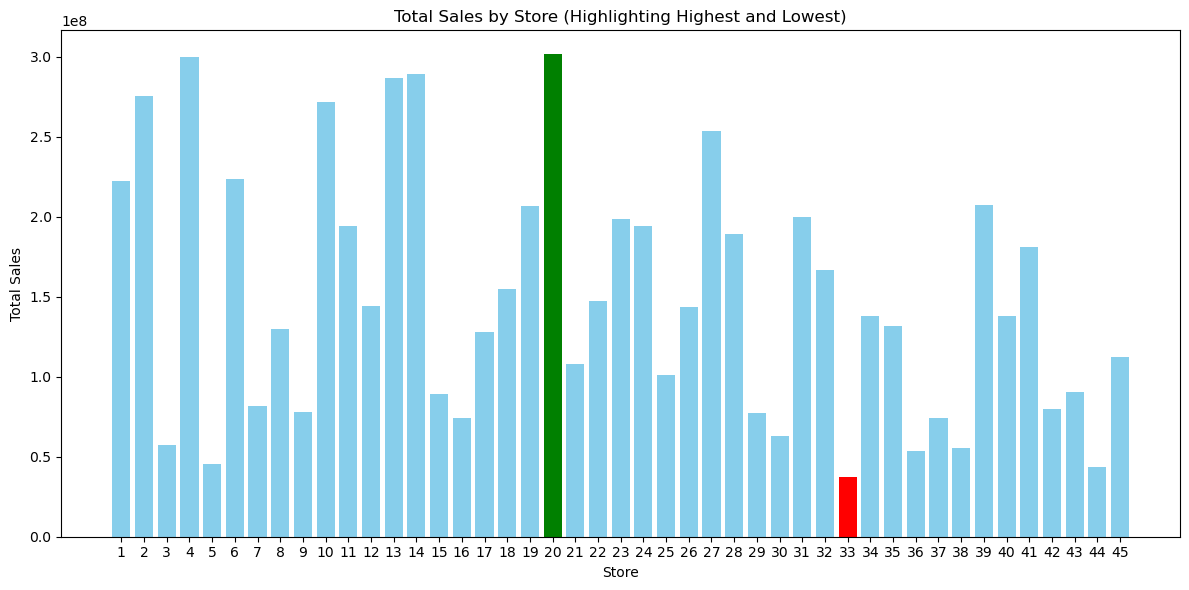

In [15]:
# Calculate total sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Create a color list to highlight highest and lowest
colors = ['skyblue' if store not in [20, 33] else 
          'green' if store == 20 else 'red' for store in store_sales.index]

# Plot
plt.figure(figsize=(12,6))
plt.bar(store_sales.index, store_sales.values, color=colors)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store (Highlighting Highest and Lowest)')
plt.xticks(store_sales.index)
plt.tight_layout()
plt.show()



#### Q2. Which stores perform best during holidays vs non-holidays?

In [16]:
# Split into holiday and non-holiday sales
holiday_sales = df[df['Holiday_Flag'] == 1]
non_holiday_sales = df[df['Holiday_Flag'] == 0]

# Total sales by store during holidays
holiday_store_sales = holiday_sales.groupby('Store')['Weekly_Sales'].sum()

# Total sales by store during non-holidays
non_holiday_store_sales = non_holiday_sales.groupby('Store')['Weekly_Sales'].sum()

# Sort to find top-performing stores
top_holiday_store = holiday_store_sales.idxmax()
top_holiday_sales = holiday_store_sales.max()

top_non_holiday_store = non_holiday_store_sales.idxmax()
top_non_holiday_sales = non_holiday_store_sales.max()

# Print results
print(f"Top Store During Holidays: Store {top_holiday_store} → ${top_holiday_sales:,.2f}")
print(f"Top Store During Non-Holidays: Store {top_non_holiday_store} → ${top_non_holiday_sales:,.2f}")


Top Store During Holidays: Store 20 → $22,490,350.81
Top Store During Non-Holidays: Store 20 → $278,907,441.65


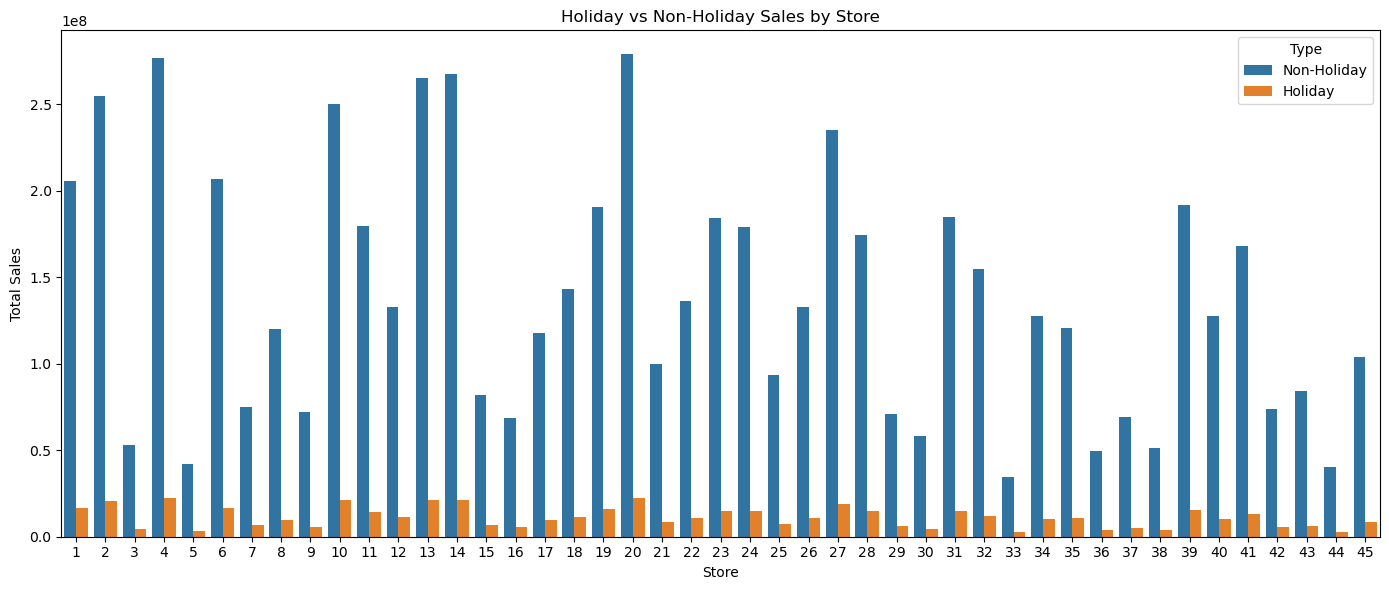

In [17]:
# Step 1: Group data
df_grouped = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].sum().reset_index()

# Step 2: Replace flag with readable label
df_grouped['Holiday_Type'] = df_grouped['Holiday_Flag'].map({1: 'Holiday', 0: 'Non-Holiday'})

# Step 3: Plot
plt.figure(figsize=(14,6))
sns.barplot(data=df_grouped, x='Store', y='Weekly_Sales', hue='Holiday_Type')

plt.title('Holiday vs Non-Holiday Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


#### Q3. Is there any seasonal trend in weekly sales across the year?

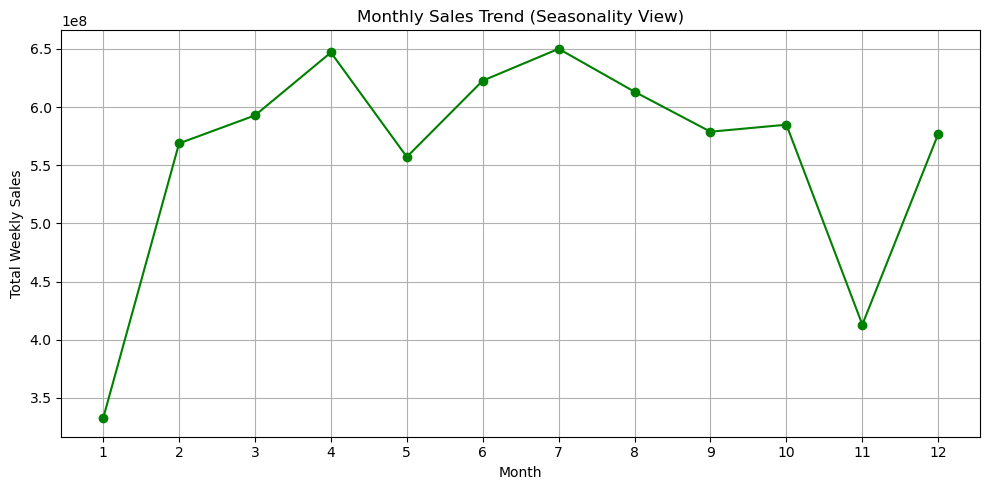

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()


plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Trend (Seasonality View)')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(range(1,13))  # 1 to 12 for months
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Monthly Sales Trend - Key Observations

- **January (Month 1):**  
  Sales were the lowest — around **3.3 × 10⁸**. This could be because people usually shop less after the New Year.

- **February to April (Months 2–4):**  
  Sales increased quickly.  
  - **April** reached a high point — around **6.45 × 10⁸**. Possibly due to spring events or holidays.

- **May (Month 5):**  
  A slight drop in sales after April, but not too much.

- **June to July (Months 6–7):**  
  Sales started rising again.  
  - **July** had the **highest sales** — about **6.5 × 10⁸**.

- **August to October (Months 8–10):**  
  Sales remained steady but showed a small decline.

- **November (Month 11):**  
  A sudden drop in sales — around **4.1 × 10⁸**.  
  This is surprising since November usually has big shopping events like Black Friday.

- **December (Month 12):**  
  Sales went up again — about **5.75 × 10⁸**, likely because of holiday shopping.

---

📝 _Overall, the data shows a seasonal pattern with clear sales peaks in spring, summer, and the holiday season._



#### Q4. Total Weekly Sales per Year

C:\Users\ALI HUZAIFA\AppData\Local\Temp\ipykernel_4992\2116763176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, palette='viridis')


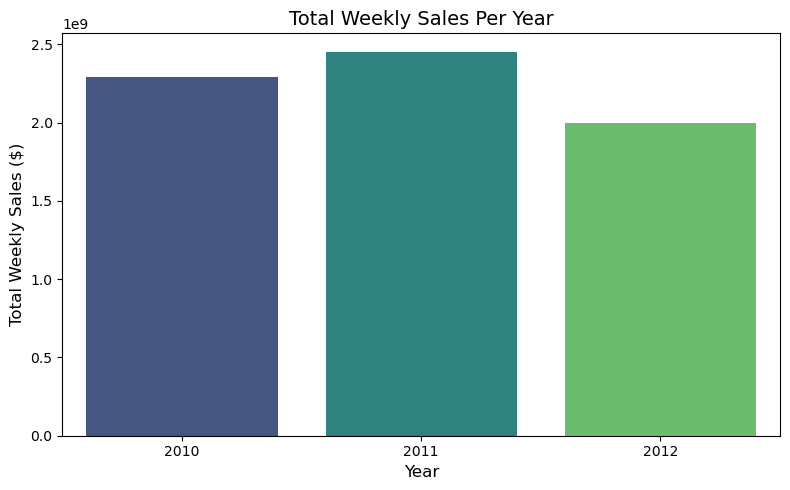

In [19]:
# Extract the year from the Date column
df['Year'] = df['Date'].dt.year
# Group by year and calculate total sales
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, palette='viridis')

plt.title('Total Weekly Sales Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Weekly Sales ($)', fontsize=12)
plt.tight_layout()
plt.show()

#### Q5. What is the average weekly sales per store?

C:\Users\ALI HUZAIFA\AppData\Local\Temp\ipykernel_4992\4234010434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_sales_per_store, x='Store', y='Weekly_Sales', palette='viridis')


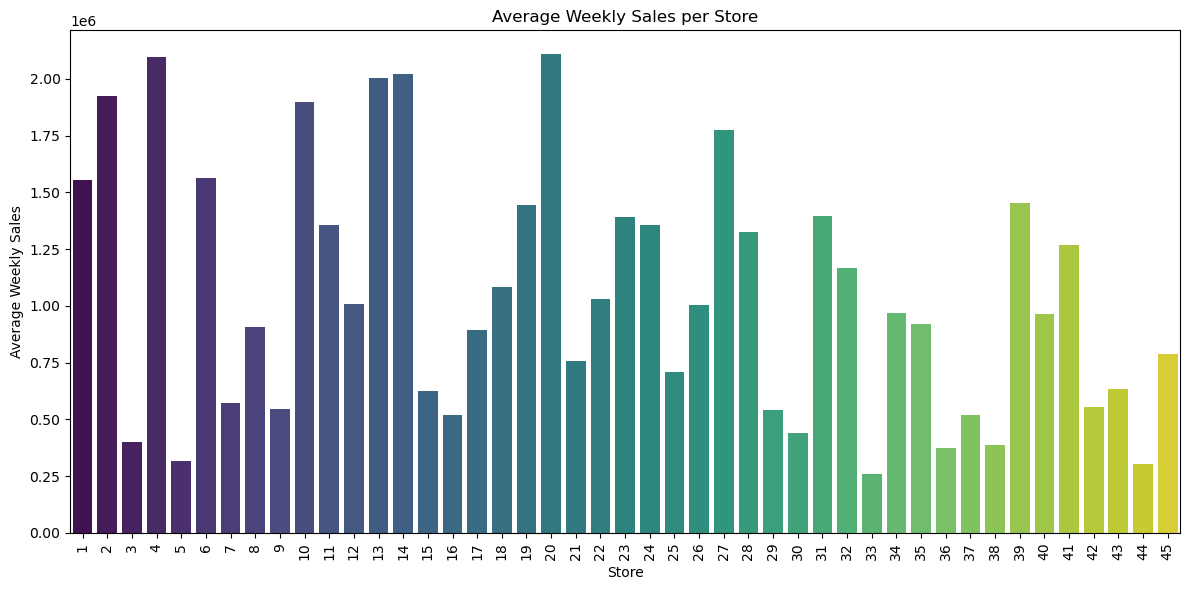

In [20]:
# Step 1: Calculate average weekly sales per store
average_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Step 2: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=average_sales_per_store, x='Store', y='Weekly_Sales', palette='viridis')

# Step 3: Add labels and title
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels if too crowded
plt.tight_layout()
plt.show()

#### Q6. What percentage of total sales comes from holiday and non holiday weeks?

Holiday Weeks Sales Contribution: 7.50%
Non Holiday Weeks Sales Contribution: 92.50%


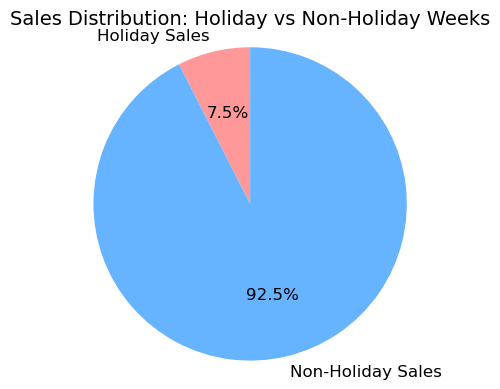

In [21]:
# Calculate sales totals
holiday_sales_total = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
non_holiday_sales_total = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

# Calculate percentage
percentage = (holiday_sales_total / (holiday_sales_total + non_holiday_sales_total)) * 100
print(f"Holiday Weeks Sales Contribution: {percentage:.2f}%")

# Calculate percentage
percentage_2 = (non_holiday_sales_total / (holiday_sales_total + non_holiday_sales_total)) * 100
print(f"Non Holiday Weeks Sales Contribution: {percentage_2:.2f}%")

# Data for pie chart
sales_data = [holiday_sales_total, non_holiday_sales_total]
labels = ['Holiday Sales', 'Non-Holiday Sales']
colors = ['#ff9999', '#66b3ff']

# Plot
plt.figure(figsize=(4,4))
plt.pie(sales_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Sales Distribution: Holiday vs Non-Holiday Weeks', fontsize=14)
plt.axis('equal')  # Keeps it a perfect circle
plt.tight_layout()
plt.show()



### Weather & Sales

#### Q7. How does temperature affect weekly sales?

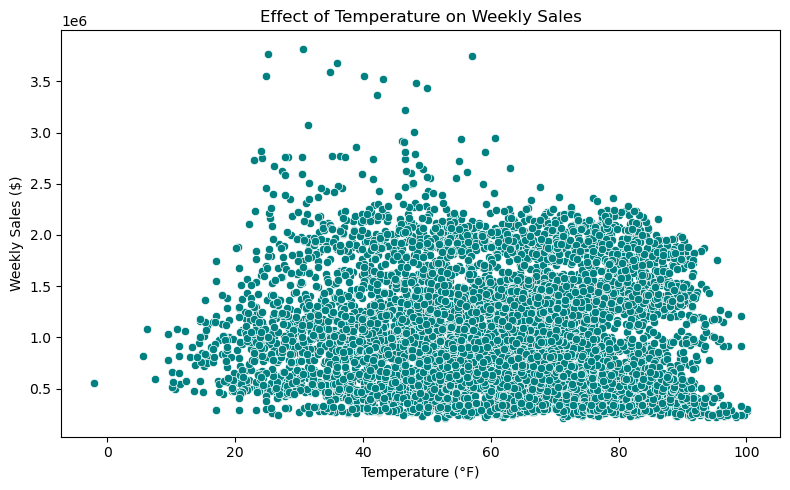

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', color='teal')

plt.title('Effect of Temperature on Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

### 📊 Observation: Temperature vs Weekly Sales

Most weekly sales happen when the temperature is between **40°F and 80°F**.  
This range usually covers the **spring to early fall months** in the US (March to October).  
People likely shop more during this pleasant weather.  
Sales are lower when it's too cold or too hot, maybe because fewer people go out.

👉 Stores can plan more offers or stock during these moderate weather months.


###  Fuel Price Impact

#### Q8. Is there a relationship between rising fuel prices and a drop in weekly sales?

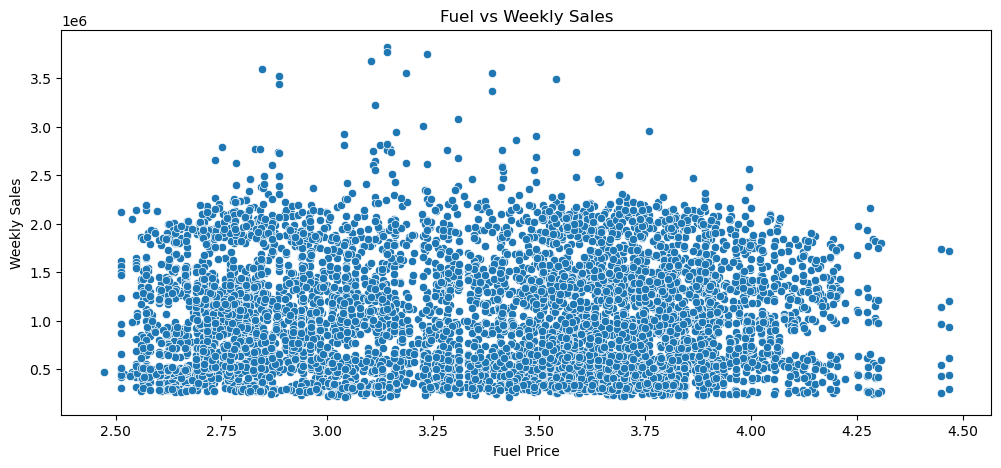

In [23]:
plt.figure(figsize=(12,5))
sns.scatterplot(data= df, x='Fuel_Price', y= 'Weekly_Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Fuel vs Weekly Sales')
plt.show()

## 🔍 Observation: Fuel Price vs Weekly Sales

- The scatter plot does **not show a strong or clear trend** between fuel prices and weekly sales.
- Sales seem to be **scattered across all fuel price ranges** (from ~$2.5 to $4.5), indicating **low correlation**.
- Even when fuel prices are higher, some stores still have high weekly sales — so fuel price **alone may not be a strong predictor** of sales.
- Most sales fall between **$0.5M to $2M**, regardless of the fuel price.

📌 **Conclusion:**  
Fuel prices do not appear to have a significant or direct impact on weekly sales across stores in this dataset.


#### Q9. Correlation Between All Numerical Column?

In [24]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.238308,0.797019


In [25]:
df_01 = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI','Unemployment','Month','Year']]
df_01.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176,0.076143,-0.018378
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960,0.122996,-0.056783
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158,0.235862,0.064269
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684,-0.042156,0.779470
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020,0.004980,0.074796
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.012746,-0.241813
Month,0.076143,0.122996,0.235862,-0.042156,0.004980,-0.012746,1.000000,-0.194465
Year,-0.018378,-0.056783,0.064269,0.779470,0.074796,-0.241813,-0.194465,1.000000


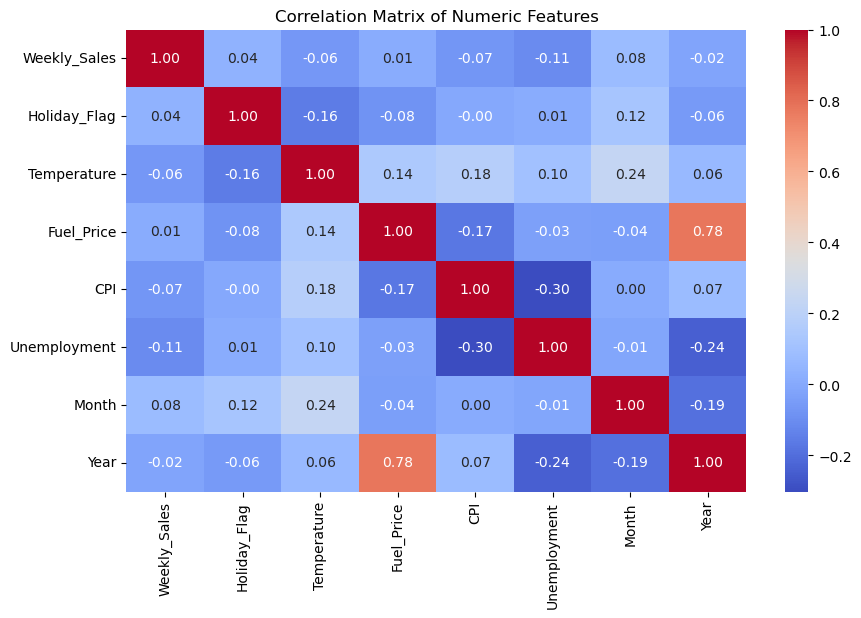

In [26]:
correlation_matrix = df_01.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 🔍 Correlation Matrix Observations

### 📊 Correlation with `Weekly_Sales`

| Feature         | Correlation | Observation |
|----------------|-------------|-------------|
| `Holiday_Flag` | **+0.04**   | Almost no impact of holidays on sales. |
| `Temperature`  | **–0.06**   | Weak negative correlation — little effect. |
| `Fuel_Price`   | **+0.01**   | No significant impact from fuel prices. |
| `CPI`          | **–0.07**   | Weak negative correlation. |
| `Unemployment` | **–0.11**   | Slight drop in sales with higher unemployment. |
| `Month`        | **+0.08**   | Weak seasonal pattern. |
| `Year`         | **–0.02**   | Sales are almost unaffected year to year. |

> ✅ **Conclusion**: None of the numerical features show a strong linear correlation with `Weekly_Sales`.

---

### 🔁 Strong Correlation Among Other Features

| Feature Pair              | Correlation | Insight |
|---------------------------|-------------|---------|
| `Fuel_Price` & `Year`     | **+0.78**   | Fuel prices increase over time. |
| `CPI` & `Unemployment`    | **–0.30**   | Slight inverse economic trend. |
| `Unemployment` & `Year`   | **–0.24**   | Unemployment decreasing over time. |
| `Temperature` & `Month`   | **+0.24**   | Warmer months are mid-year (summer effect). |



Monthly Trends (Time-Series)

#### Q10. What are the quarterly sales patterns?

C:\Users\ALI HUZAIFA\AppData\Local\Temp\ipykernel_4992\3449650642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Quarter', y='Weekly_Sales', palette='crest')


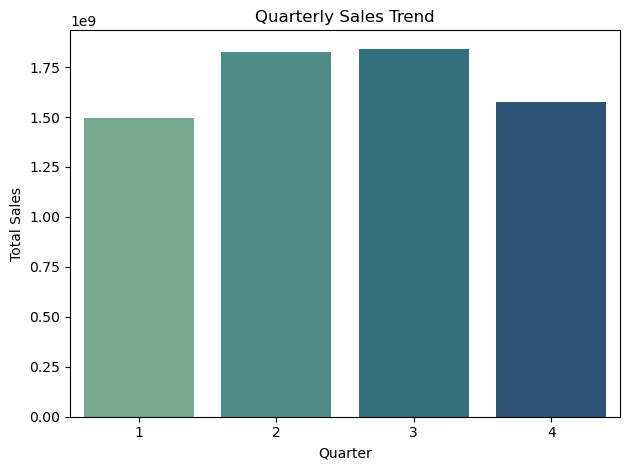

In [27]:
df['Quarter'] = df['Date'].dt.quarter
quarterly_sales = df.groupby('Quarter')['Weekly_Sales'].sum().reset_index()

sns.barplot(data=quarterly_sales, x='Quarter', y='Weekly_Sales', palette='crest')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


#### Q11. Weekly Sales Across Months

C:\Users\ALI HUZAIFA\AppData\Local\Temp\ipykernel_4992\164601261.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Month', y='Weekly_Sales', palette='coolwarm')


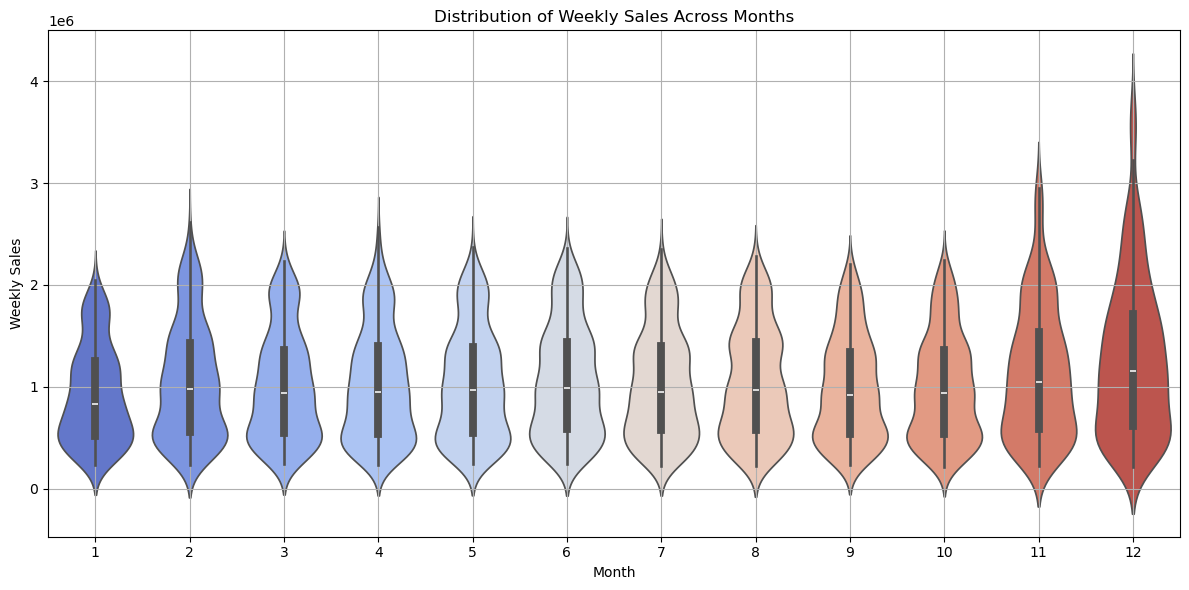

In [28]:
# Extract Month from Date if not already done
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Month', y='Weekly_Sales', palette='coolwarm')
plt.title('Distribution of Weekly Sales Across Months')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.0  Summary of EDA

This project explores Walmart's weekly sales data to uncover key business insights. Here's what we found:

- **Top/Bottom Stores:** Identified the highest and lowest performing stores based on total weekly sales.
- **Holiday Impact:** Sales tend to increase during major holidays like Christmas and Thanksgiving.
- **Seasonal Trends:** Sales peak in November and December, showing clear seasonal patterns.
- **Temperature Effect:** Slight inverse relationship between temperature and sales — extreme weather may reduce purchases.
- **Fuel Price Impact:** Mild negative correlation observed between fuel price and weekly sales.
- **CPI Analysis:** No strong direct correlation with weekly sales.
- **Visualizations:** Used line plots, bar charts, violin plots, scatter plots, and correlation heatmaps to explore patterns.

This EDA helped in understanding how external factors like holidays, weather, and economy affect retail performance.


### 7.0 Contact Detail

  - Contact Info

[![LinkedIn](https://img.shields.io/badge/-LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/ali-huzaifa-cs/)
[![GitHub](https://img.shields.io/badge/-GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AliHuzaifa-cs)
[![Twitter](https://img.shields.io/badge/-Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/AlihuzaifaCS)
[![Instagram](https://img.shields.io/badge/-Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/code_with_alih/)
[![Facebook](https://img.shields.io/badge/-Facebook-1877F2?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/share/16bQPkMukv/?mibextid=wwXIfr)

---

## 🎉 8.0 Thank You

Thanks for exploring this Walmart Sales Analysis project!  
Your feedback or suggestions are most welcome 🙌  

If you liked this notebook, consider giving it an **upvote** ⭐  
Feel free to **connect** with me through the links above!

---
